In [9]:
import IPython
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys ; sys.path.append('../')
from model.network_architecture import autoencoder
from tqdm import tqdm
from evaluacion import *

In [11]:
PESOS = '/media/martin/martindrive/ckpts/aug/weights.10-0.004.hdf5'
modelo = autoencoder()
modelo.load_weights(PESOS)

In [12]:
clean_list = get_audio_list('/home/martin/deep-dereverb/data/test/clean/')
reverb_list = get_audio_list('/home/martin/deep-dereverb/data/test/real/')
reverb_list.sort(); clean_list.sort()

In [13]:
audio_in, fs = librosa.load(reverb_list[0], sr=None)
audio_target, fs = librosa.load(clean_list[0], sr=None)
espectro_in, arr_min, arr_max = gen_stft(audio_in)
espectro_target, _, _ = gen_stft(audio_target)

In [14]:
espectro_out = modelo.predict([espectro_in.reshape(1,256,256)])
espectro_out = espectro_out.reshape(256,256)

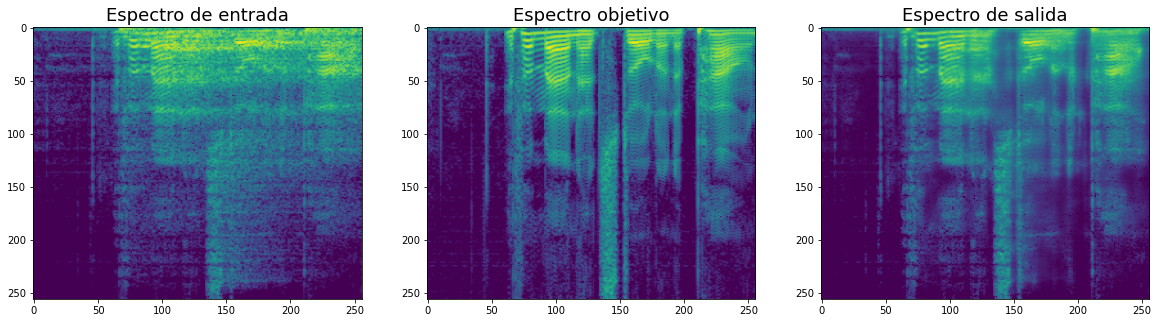

In [15]:
plt.figure(1, figsize=(20,5))
plt.subplot(1,3,1);plt.title('Espectro de entrada', size=18)
plt.imshow(espectro_in, aspect='auto')#;plt.colorbar()
plt.subplot(1,3,2);plt.title('Espectro objetivo', size=18)
plt.imshow(espectro_target, aspect='auto')#;plt.colorbar()
plt.subplot(1,3,3);plt.title('Espectro de salida', size=18)
plt.imshow(espectro_out, aspect='auto')#;plt.colorbar()
plt.savefig('funcionamiento.png')

In [16]:
audio_out = frame_to_raw(espectro_out, arr_min, arr_max)

In [17]:
print('Audio con reverb (entrada)')
IPython.display.display(IPython.display.Audio(audio_in, rate=fs))
print('Audio anecoico (objetivo)')
IPython.display.display(IPython.display.Audio(audio_target, rate=fs))
print('Audio dereverberado (resultado)')
IPython.display.display(IPython.display.Audio(audio_out, rate=fs))

Audio con reverb (entrada)


Audio anecoico (objetivo)


Audio dereverberado (resultado)


# Evaluacion de metricas

In [22]:
clean_list = get_audio_list('/home/martin/deep-dereverb/data/test/clean/')
C4DM_list = get_audio_list('/home/martin/deep-dereverb/data/test/real/')

SRMR_reverb = []
SDR_reverb = []
ESTOI_reverb = []

SRMR_dereverb = []
SDR_dereverb = []
ESTOI_dereverb = []

for clean_path, reverb_path in tqdm(zip(clean_list, C4DM_list), total=len(clean_list)):
    # Leo los audios de partida
    clean, fs = librosa.load(clean_path, sr=None)
    reverb, fs = librosa.load(reverb_path, sr=None)

    # Aplico el modelo
    espectro_in, arr_min, arr_max = gen_stft(reverb)
    espectro_out = modelo.predict([espectro_in.reshape(1,256,256)])
    espectro_out = espectro_out.reshape(256,256)
    dereverb = frame_to_raw(espectro_out, arr_min, arr_max)
    
    # Calculo las metricas para clean-reverb y clean-dereverb
    srmr, sdr, estoi = get_metricas(clean, reverb, fs)
    SRMR_reverb.append(srmr)
    SDR_reverb.append(sdr)
    ESTOI_reverb.append(estoi)
    
    srmr, sdr, estoi = get_metricas(clean, dereverb, fs)
    SRMR_dereverb.append(srmr)
    SDR_dereverb.append(sdr)
    ESTOI_dereverb.append(estoi)
    
    

  0%|          | 0/8262 [00:00<?, ?it/s]

asdasd


  0%|          | 1/8262 [00:00<2:08:16,  1.07it/s]

asdasd


  0%|          | 2/8262 [00:02<2:26:33,  1.06s/it]

asdasd


  0%|          | 3/8262 [00:03<2:42:23,  1.18s/it]

asdasd


  0%|          | 4/8262 [00:04<2:38:25,  1.15s/it]

asdasd


  0%|          | 5/8262 [00:05<2:42:03,  1.18s/it]

asdasd


  0%|          | 6/8262 [00:06<2:37:46,  1.15s/it]

asdasd


  0%|          | 7/8262 [00:08<2:41:15,  1.17s/it]

asdasd


  0%|          | 8/8262 [00:09<2:47:03,  1.21s/it]

asdasd


  0%|          | 9/8262 [00:10<2:46:40,  1.21s/it]

asdasd


  0%|          | 10/8262 [00:11<2:43:02,  1.19s/it]

asdasd


  0%|          | 11/8262 [00:13<2:49:40,  1.23s/it]

asdasd


  0%|          | 12/8262 [00:14<2:47:20,  1.22s/it]

asdasd


  0%|          | 13/8262 [00:15<2:46:29,  1.21s/it]

asdasd


  0%|          | 14/8262 [00:16<2:54:10,  1.27s/it]

asdasd


  0%|          | 15/8262 [00:18<2:56:30,  1.28s/it]

asdasd


  0%|          | 16/8262 [00:19<2:52:27,  1.25s/it]

asdasd


  0%|          | 17/8262 [00:20<2:51:00,  1.24s/it]

asdasd


  0%|          | 18/8262 [00:21<2:51:10,  1.25s/it]

asdasd


  0%|          | 19/8262 [00:22<2:48:52,  1.23s/it]

asdasd


  0%|          | 20/8262 [00:24<2:45:58,  1.21s/it]

asdasd


  0%|          | 21/8262 [00:25<2:48:06,  1.22s/it]

asdasd


  0%|          | 22/8262 [00:26<2:52:19,  1.25s/it]

asdasd


  0%|          | 23/8262 [00:27<2:52:54,  1.26s/it]

asdasd


  0%|          | 24/8262 [00:29<2:54:57,  1.27s/it]

asdasd


  0%|          | 25/8262 [00:30<2:52:50,  1.26s/it]

asdasd


  0%|          | 26/8262 [00:31<2:53:45,  1.27s/it]

asdasd


  0%|          | 27/8262 [00:33<2:59:49,  1.31s/it]

asdasd


  0%|          | 28/8262 [00:34<3:00:35,  1.32s/it]

asdasd


  0%|          | 29/8262 [00:35<2:56:33,  1.29s/it]

asdasd


  0%|          | 30/8262 [00:37<2:59:08,  1.31s/it]

asdasd


  0%|          | 31/8262 [00:38<3:00:51,  1.32s/it]

asdasd


  0%|          | 32/8262 [00:39<3:08:24,  1.37s/it]

asdasd


  0%|          | 33/8262 [00:41<3:05:52,  1.36s/it]

asdasd


  0%|          | 34/8262 [00:42<2:52:12,  1.26s/it]


KeyboardInterrupt: 

In [59]:

np.save('resultados/SRMR_reverb.npy', SRMR_reverb)
np.save('resultados/SDR_reverb.npy', SDR_reverb)
np.save('resultados/ESTOI_reverb.npy', ESTOI_reverb)

np.save('resultados/SRMR_dereverb.npy', SRMR_dereverb)
np.save('resultados/SDR_dereverb.npy', SDR_dereverb)
np.save('resultados/ESTOI_dereverb.npy', ESTOI_dereverb)


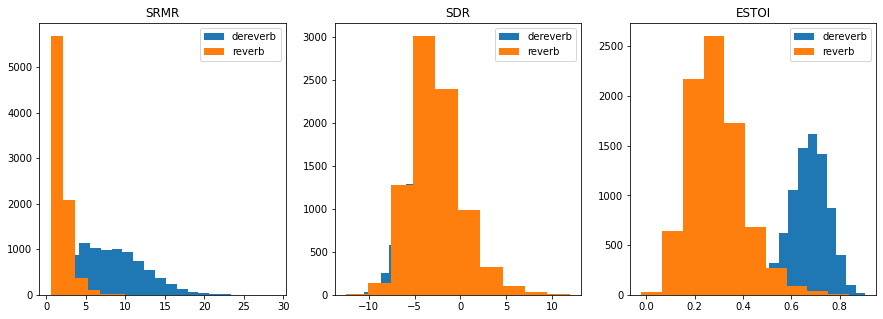

In [65]:
plt.figure(1, figsize=(15,5))
plt.subplot(1,3,1);plt.title('SRMR')
plt.hist(SRMR_dereverb, bins=20, label='dereverb'); plt.hist(SRMR_reverb, label='reverb')
plt.legend()
plt.subplot(1,3,2);plt.title('SDR')
plt.hist(SDR_dereverb, bins=20, label='dereverb'); plt.hist(SDR_reverb, label='reverb')
plt.legend()
plt.subplot(1,3,3);plt.title('ESTOI')
plt.hist(ESTOI_dereverb, bins=20, label='dereverb'); plt.hist(ESTOI_reverb, label='reverb')
plt.legend()